In [1]:
# loading data
import pandas as pd
import numpy as np

# visualization
import matplotlib.pyplot as plt
import seaborn as sns

# model building
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

# used to balance imbalance data
from imblearn.over_sampling import SMOTE
#warnings

import warnings
warnings.filterwarnings('ignore')


In [2]:
df=pd.read_csv(r"C:\Users\Dell\Desktop\ml projects\Telecom Customer Churn ML\data\churn_dataset.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.shape

(7043, 21)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


 `observation`
- **Categorical columns:**
gender, Partner, Dependents, PhoneService, MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, Contract, PaperlessBilling, PaymentMethod

- **Numerical columuns:**
  tenure, MonthlyCharges, TotalCharges, SeniorCitizen

- **target variable is**:
  Churn (Yes/NO)

- but the **Total Charges** have data type is object so we have to convert it to numeric
- and also removing unnessary column **customerID**

In [5]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [6]:
df['TotalCharges'].isnull().sum()

11

- filling the missing value of TotalCharges after converting it to numeric

In [7]:
df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)

- drop customerID unnessary column

In [8]:
df.drop('customerID', axis=1, inplace=True)

In [9]:
df.head(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes


In [10]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2281.916928
std,0.368612,24.559481,30.090047,2265.270398
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,402.225000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [11]:
df.describe(include='object')

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,2
top,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
freq,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,5174


In [12]:
# code for seeing colusmn value counts
cols = [
    'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
    'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
    'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
    'PaperlessBilling', 'PaymentMethod', 'Churn'
]

for col in cols:
    print(f"\nValue counts for {col}:")
    print(df[col].value_counts())



Value counts for gender:
gender
Male      3555
Female    3488
Name: count, dtype: int64

Value counts for Partner:
Partner
No     3641
Yes    3402
Name: count, dtype: int64

Value counts for Dependents:
Dependents
No     4933
Yes    2110
Name: count, dtype: int64

Value counts for PhoneService:
PhoneService
Yes    6361
No      682
Name: count, dtype: int64

Value counts for MultipleLines:
MultipleLines
No                  3390
Yes                 2971
No phone service     682
Name: count, dtype: int64

Value counts for InternetService:
InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: count, dtype: int64

Value counts for OnlineSecurity:
OnlineSecurity
No                     3498
Yes                    2019
No internet service    1526
Name: count, dtype: int64

Value counts for OnlineBackup:
OnlineBackup
No                     3088
Yes                    2429
No internet service    1526
Name: count, dtype: int64

Value counts for DeviceProtection:
Devic

In [13]:
df.isna().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

- Dataset don't have missing value

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns


Churn
No     5174
Yes    1869
Name: count, dtype: int64


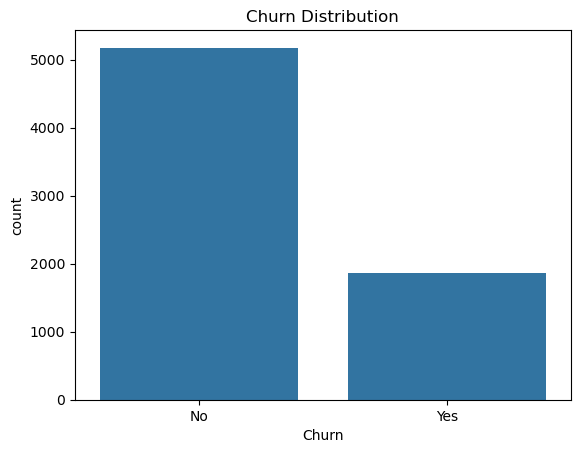

In [15]:
print(df['Churn'].value_counts())

sns.countplot(x='Churn', data=df)
plt.title("Churn Distribution")
plt.show()


- our Target data is imbalanced if we build the model based on this data the model predict the wrong output

## EDA 

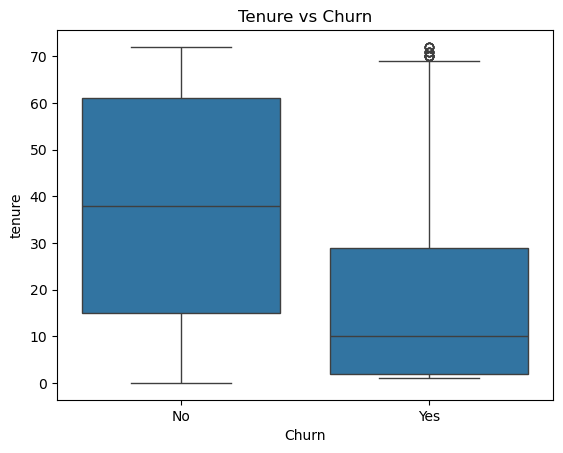

In [16]:
sns.boxplot(x='Churn', y='tenure', data=df)
plt.title("Tenure vs Churn")
plt.show()


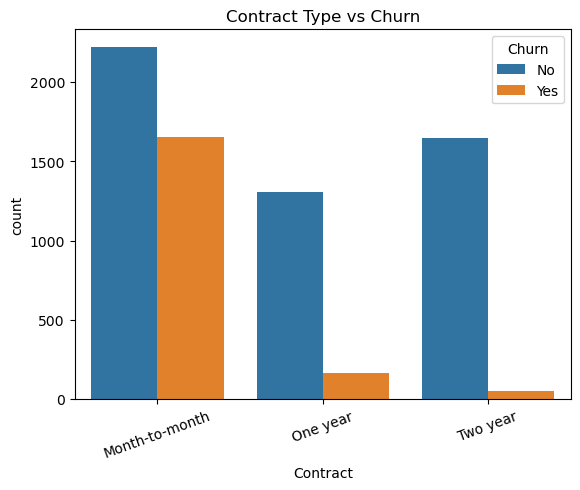

In [17]:
sns.countplot(x='Contract', hue='Churn', data=df)
plt.title("Contract Type vs Churn")
plt.xticks(rotation=20)
plt.show()


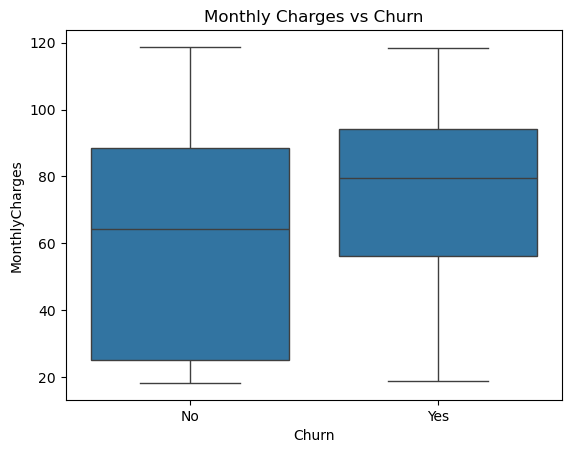

In [18]:
sns.boxplot(x='Churn', y='MonthlyCharges', data=df)
plt.title("Monthly Charges vs Churn")
plt.show()


In [14]:
df.to_csv("telecom_dashboard.csv")

# Data Preparation

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

- encoding target variable

In [20]:
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

- encoding binary variable with label encoding

In [21]:
# features
categorical_cols = df.select_dtypes(include='object').columns

le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

- Feature scalling

In [43]:
# scaler = StandardScaler()

# num_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
# df[num_cols] = scaler.fit_transform(df[num_cols])


- Train test split

In [22]:
X = df.drop('Churn', axis=1)
y = df['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)


In [24]:
X_train['gender'].value_counts()

gender
1    2657
0    2625
Name: count, dtype: int64

In [46]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


- Handeling imbalance data using SMOTE

In [49]:
smote = SMOTE(random_state=42)

X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

print("Before SMOTE:", y_train.value_counts())
print("After SMOTE:", pd.Series(y_train_resampled).value_counts())


Before SMOTE: Churn
0    3880
1    1402
Name: count, dtype: int64
After SMOTE: Churn
0    3880
1    3880
Name: count, dtype: int64


## model building

- logistic regression

In [50]:
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train_res, y_train_res)

LogisticRegression(max_iter=1000)

- Random Forest Classifier

In [51]:
rf = RandomForestClassifier( n_estimators=200, random_state=42)
rf.fit(X_train_res, y_train_res)

RandomForestClassifier(n_estimators=200, random_state=42)

- Decision Tree Classifier

In [53]:
dt = DecisionTreeClassifier(random_state=42,max_depth=10)
dt.fit(X_train_res, y_train_res)

DecisionTreeClassifier(max_depth=10, random_state=42)

- Support Vector Classifier

In [54]:
svm = SVC(kernel='rbf', C=1, gamma='scale')
svm.fit(X_train_res, y_train_res)

SVC(C=1)

- KNN classifier

In [55]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train_res, y_train_res)

KNeighborsClassifier(n_neighbors=7)

# Evaluation matrix

- liner reg model

In [57]:
y_pred_lr = lr.predict(X_test)

print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print(confusion_matrix(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))

Logistic Regression Accuracy: 0.7455990914253265
[[946 348]
 [100 367]]
              precision    recall  f1-score   support

           0       0.90      0.73      0.81      1294
           1       0.51      0.79      0.62       467

    accuracy                           0.75      1761
   macro avg       0.71      0.76      0.71      1761
weighted avg       0.80      0.75      0.76      1761



- Ramdom Forest classifier

In [58]:
y_pred_rf = rf.predict(X_test)

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

Random Forest Accuracy: 0.7808063600227144
[[1096  198]
 [ 188  279]]
              precision    recall  f1-score   support

           0       0.85      0.85      0.85      1294
           1       0.58      0.60      0.59       467

    accuracy                           0.78      1761
   macro avg       0.72      0.72      0.72      1761
weighted avg       0.78      0.78      0.78      1761



- Decision Tree Classifier

In [59]:
dt.fit(X_train_res, y_train_res)

y_pred_dt = dt.predict(X_test)

print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print(confusion_matrix(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))

Decision Tree Accuracy: 0.7370812038614424
[[972 322]
 [141 326]]
              precision    recall  f1-score   support

           0       0.87      0.75      0.81      1294
           1       0.50      0.70      0.58       467

    accuracy                           0.74      1761
   macro avg       0.69      0.72      0.70      1761
weighted avg       0.78      0.74      0.75      1761



- SVC 

In [60]:
y_pred_svm = svm.predict(X_test)

print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print(confusion_matrix(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))

SVM Accuracy: 0.7603634298693924
[[1001  293]
 [ 129  338]]
              precision    recall  f1-score   support

           0       0.89      0.77      0.83      1294
           1       0.54      0.72      0.62       467

    accuracy                           0.76      1761
   macro avg       0.71      0.75      0.72      1761
weighted avg       0.79      0.76      0.77      1761



- KNN Classifier

In [61]:
y_pred_knn = knn.predict(X_test)

print("KNN Accuracy:", accuracy_score(y_test, y_pred_knn))
print(confusion_matrix(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))

KNN Accuracy: 0.6893810335036911
[[860 434]
 [113 354]]
              precision    recall  f1-score   support

           0       0.88      0.66      0.76      1294
           1       0.45      0.76      0.56       467

    accuracy                           0.69      1761
   macro avg       0.67      0.71      0.66      1761
weighted avg       0.77      0.69      0.71      1761



In [62]:
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print("KNN Accuracy:", accuracy_score(y_test, y_pred_knn))

Logistic Regression Accuracy: 0.7455990914253265
Random Forest Accuracy: 0.7808063600227144
Decision Tree Accuracy: 0.7370812038614424
SVM Accuracy: 0.7603634298693924
KNN Accuracy: 0.6893810335036911


In [70]:
import pickle

# 1️ Save trained Random Forest model
with open("churn_model.pkl", "wb") as f:
    pickle.dump(rf, f)

# 2️ Save fitted scaler
with open("scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)

# 3️ Save feature column names (order matters!)
with open("feature_columns.pkl", "wb") as f:
    pickle.dump(X.columns.tolist(), f)

print(" All PKL files created successfully!")


 All PKL files created successfully!
